In [1]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot,autocorrelation_plot
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dmt = pd.read_csv('C:\\Users\\dhima\\anaconda3\\5th Week\\daily-min-temperatures.txt',header=0, index_col=0)
dmt

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [3]:
dmt1 = dmt.apply(pd.to_numeric)
print(dmt.dtypes)

Temp    float64
dtype: object


<AxesSubplot:xlabel='Date'>

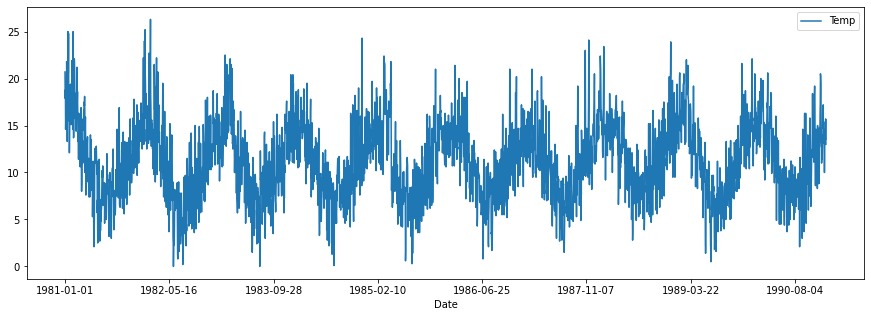

In [5]:
dmt1.plot(figsize=(15,5))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

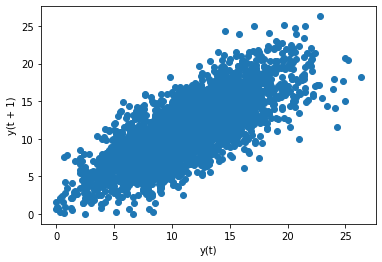

In [6]:
lag_plot(dmt1)

In [7]:
dmt1_corr = pd.concat([dmt1.shift(1),dmt1],axis=1)
dmt1_corr.columns=['t-1','t+1']
dmt1_corr.corr(method="pearson")

,t-1,t+1
t-1,1.00000,0.77487
t+1,0.77487,1.00000


<AxesSubplot:>

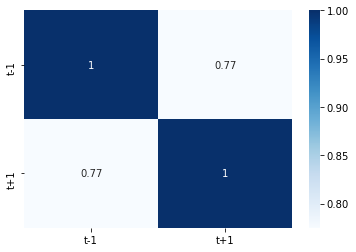

In [8]:
sns.heatmap(dmt1_corr.corr(method="pearson"),cmap="Blues",annot=True)
#Shows strong positive Correlation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

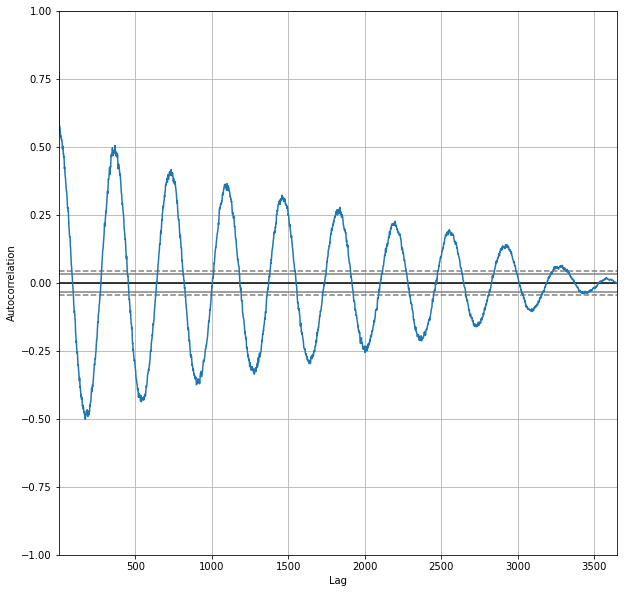

In [9]:
#Autocorrelation plot
plt.figure(figsize=(10,10))
autocorrelation_plot(dmt1)

In [10]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
X = dmt1.values
train,test = X[1:len(X)-7],X[len(X)-7:]
print(train.shape)
print(test.shape)

(3642, 1)
(7, 1)


In [11]:
model = AR(train)
model_fit= model.fit()

window = model_fit.k_ar #Variables
coeff = model_fit.params # Coefficients
#Linear Regression - y= bX1 + bX2 ... + bXn

history = train[len(train) - window:]

len(train) - 29

3613

In [12]:
history

array([[12.9],
       [ 8.8],
       [14.7],
       [14.7],
       [12.7],
       [13.3],
       [13.2],
       [16.2],
       [17.3],
       [20.5],
       [20.2],
       [19.4],
       [15.5],
       [14.1],
       [11. ],
       [11.1],
       [14. ],
       [11.4],
       [12.5],
       [13.4],
       [13.6],
       [13.9],
       [17.2],
       [14.7],
       [15.4],
       [13.1],
       [13.2],
       [13.9],
       [10. ]])

In [13]:
history = [history[i] for i in range(len(history))]

In [14]:
history

[array([12.9]),
 array([8.8]),
 array([14.7]),
 array([14.7]),
 array([12.7]),
 array([13.3]),
 array([13.2]),
 array([16.2]),
 array([17.3]),
 array([20.5]),
 array([20.2]),
 array([19.4]),
 array([15.5]),
 array([14.1]),
 array([11.]),
 array([11.1]),
 array([14.]),
 array([11.4]),
 array([12.5]),
 array([13.4]),
 array([13.6]),
 array([13.9]),
 array([17.2]),
 array([14.7]),
 array([15.4]),
 array([13.1]),
 array([13.2]),
 array([13.9]),
 array([10.])]

In [15]:
predictions=[]

for t in test:
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    y = coeff[0]
    for d in range(window):       
        y += coeff[d + 1] * lag[window - d - 1]
        #print(coeff[d + 1] * lag[window - d - 1])
    predictions.append(y)
    history.append(t)
    print(f"Predicted :{y} and expected value:{t}")

Predicted :[11.87127485] and expected value:[12.9]
Predicted :[13.65929693] and expected value:[14.6]
Predicted :[14.34924559] and expected value:[14.]
Predicted :[13.42745378] and expected value:[13.6]
Predicted :[13.37487746] and expected value:[13.5]
Predicted :[13.47999077] and expected value:[15.7]
Predicted :[14.76514638] and expected value:[13.]


In [16]:
mean_squared_error(test,predictions)

1.4506829660623788

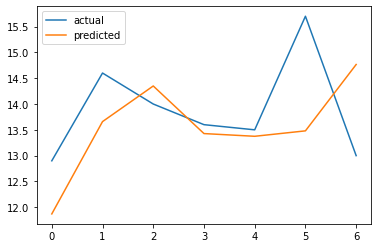

In [17]:
plt.plot(test,label='actual')
plt.plot(predictions,label='predicted')
plt.legend()